In [1]:
import os,sys,time
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib_venn import venn2

In [2]:
projection = pd.read_csv("/exports/reum/CKe/PCArun/Tacera_onRef/PCA_run/projections.txt",sep='\t')
projection

,FID,IID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,1_1_Leiden,1_1_Leiden,-0.083052,0.183613,-0.054357,-0.051256,0.015168,0.003942,-0.006357,-0.008177,-0.004226,-0.030144
1,1_215284670,1_215284670,-0.084010,0.185407,-0.051003,-0.052496,0.013771,0.004195,-0.000729,-0.003366,-0.008006,-0.025381
2,1_RAMS23006,1_RAMS23006,-0.077038,0.183521,-0.054012,-0.056410,0.013421,-0.000389,-0.003141,-0.010241,-0.004112,-0.025144
3,2_2_Leiden,2_2_Leiden,-0.082222,0.180424,-0.056529,-0.054962,0.017522,0.001825,-0.004645,-0.005804,-0.001250,-0.023537
4,2_215294580,2_215294580,-0.078158,0.190234,-0.056789,-0.060057,0.019994,-0.003253,-0.005352,-0.000887,-0.004286,-0.022060
...,...,...,...,...,...,...,...,...,...,...,...,...
6151,RAMS_526_RAMS_526,RAMS_526_RAMS_526,-0.080901,0.183024,-0.056603,-0.054223,0.006959,0.000044,-0.002128,-0.006589,-0.002730,-0.030390
6152,RAMS_527_RAMS_527,RAMS_527_RAMS_527,-0.080698,0.183844,-0.055136,-0.052812,0.014633,-0.001238,-0.007249,-0.005079,-0.002444,-0.032173
6153,Z-21686-1_Z-21686-1,Z-21686-1_Z-21686-1,-0.145329,-0.193895,-0.034260,-0.062271,-0.007095,0.004355,-0.053356,-0.002682,-0.001403,-0.004411
6154,Z-21746-1_Z-21746-1,Z-21746-1_Z-21746-1,-0.078532,0.188409,-0.063664,-0.057128,0.017501,0.000063,-0.004377,-0.005007,0.000278,-0.022066


In [3]:
(projection["FID"]!=projection['IID']).sum()

0

In [6]:
loc_list=[]
for root, dirs, files in os.walk("/exports/reum/CKe/Pipelinerun_withPC"):
    for file in files:
        if file.endswith("re.covar"): #"re_pc.covar"
            loc = os.path.join(root, file)
            loc_list.append(loc)

In [4]:
loc_list.append("/exports/reum/CKe/Pipelinerun_withPC/Tacera/Final_imputed/tacera_pc.covar")

In [7]:
#len(loc_list) #11
loc_list

['/exports/reum/CKe/Pipelinerun_withPC/Glasgow/mergedChr/Glasgow_re.covar']

In [17]:
chunks = os.path.split(loc_list[1])
chunks[0]+'/'+chunks[1].split(".")[0]+'_pc.covar'

'/exports/reum/CKe/Pipelinerun_withPC/Madrid/mergedChr/Madrid_re_pc_pc.covar'

In [10]:
covar = pd.read_csv(loc_list[0],sep='\t')
covar = covar.loc[:,['FID','IID','Sex','AGE']]

In [11]:
merge_temp = pd.merge(covar,projection.drop('IID',axis=1),how='left',on="FID")
merge_temp

,FID,IID,Sex,AGE,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,RAMS_1_RAMS_1,RAMS_1_RAMS_1,2,56.92845,-0.078231,0.191492,-0.058855,-0.053117,0.027218,-0.003952,-0.009589,-0.000939,-0.008681,-0.025243
1,RAMS_10_RAMS_10,RAMS_10_RAMS_10,1,71.00582,-0.080115,0.186037,-0.057702,-0.051973,0.019459,-0.002467,-0.010242,-0.005946,-0.002978,-0.029869
2,RAMS_100_RAMS_100,RAMS_100_RAMS_100,1,50.97432,-0.077627,0.183967,-0.048238,-0.057623,0.003237,-0.001353,0.000322,-0.001831,-0.003461,-0.027147
3,RAMS_102_RAMS_102,RAMS_102_RAMS_102,2,39.50428,-0.079593,0.189856,-0.058561,-0.052300,0.017921,-0.004110,-0.004274,-0.005370,-0.007896,-0.025958
4,RAMS_103_RAMS_103,RAMS_103_RAMS_103,1,61.26669,-0.074982,0.186435,-0.054234,-0.049133,0.006243,0.004503,-0.005701,-0.002352,-0.005478,-0.014639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,RAMS_89_RAMS_89,RAMS_89_RAMS_89,1,71.65765,-0.080194,0.190471,-0.055301,-0.060775,0.012286,-0.001084,-0.008884,-0.007223,-0.007976,-0.038338
241,RAMS_91_RAMS_91,RAMS_91_RAMS_91,1,54.69360,-0.081712,0.186806,-0.054742,-0.054595,0.007252,-0.002291,-0.005788,-0.003798,-0.005034,-0.031824
242,RAMS_93_RAMS_93,RAMS_93_RAMS_93,1,65.67614,-0.078794,0.189432,-0.058837,-0.059821,0.008680,-0.002188,-0.007336,-0.003010,0.005834,-0.022585
243,RAMS_95_RAMS_95,RAMS_95_RAMS_95,2,43.39883,-0.083649,0.179430,-0.053251,-0.057869,0.006631,0.003545,-0.005001,-0.005339,-0.004568,-0.031111


In [8]:
#merge PCs with bim files
#take sex and age, add 10 pcs
for run in loc_list:
    covar = pd.read_csv(run,sep='\t')
    covar = covar.loc[:,['FID','IID','Sex','AGE']]
    merge_temp = pd.merge(covar,projection.drop('IID',axis=1),how='left',on="FID")
    if merge_temp.shape[0] != covar.shape[0]:
        print("unmatched FID in cohort ",run)
    else:
        chunks = os.path.split(run)
        new_loc = chunks[0]+'/'+chunks[1].split(".")[0]+'_pc.covar'
        merge_temp.to_csv(new_loc,sep='\t',index=False)
        print("save new covar to: ",new_loc) # change new_loc to run if want to overwrite

save new covar to:  /exports/reum/CKe/Pipelinerun_withPC/Glasgow/mergedChr/Glasgow_re_pc.covar


In [4]:
missnp_afterDupRemove = pd.read_table("/exports/reum/CKe/PCArun/without_Tacera/Merge_cohorts/cohorts_merged-merge.missnp",header=None)

In [5]:
missnp_afterDupRemove

,0
0,10:100189568
1,10:10204103
2,10:105479020
3,10:105579594
4,10:105591779
...,...
2339,9:9779811
2340,9:97859026
2341,9:98596552
2342,9:98845585


In [6]:
missnp_noDupRemove = pd.read_table("/exports/reum/CKe/PCArun/without_Tacera/Merge_cohorts/cohorts_merged-merge.missnp",header=None)

In [7]:
missnp_noDupRemove

,0
0,10:100189568
1,10:100227627
2,10:101396317
3,10:10204103
4,10:102368422
...,...
5505,9:98596552
5506,9:9874923
5507,9:98845585
5508,9:9900526


In [2]:
bim_merged_witha1 = pd.read_csv("/exports/reum/CKe/PCArun/without_Tacera/id_withonly_allele1/Merge_cohorts/cohorts_merged.bim",sep='\t',header=None)
bim_merged_witha1

,0,1,2,3,4,5
0,1,1:730087:T,0,730087,C,T
1,1,1:781845:A,0,781845,G,A
2,1,1:790465:G,0,790465,A,G
3,1,1:800193:A,0,800193,T,A
4,1,1:810780:G,0,810780,C,G
...,...,...,...,...,...,...
998123,22,22:51219006:G,0,51219006,A,G
998124,22,22:51219704:G,0,51219704,A,G
998125,22,22:51222100:G,0,51222100,T,G
998126,22,22:51229805:T,0,51229805,C,T


In [3]:
bim_merged = pd.read_csv("/exports/reum/CKe/PCArun/without_Tacera/Merge_cohorts/cohorts_merged.bim",sep='\t',header=None)

In [4]:
bim_merged

,0,1,2,3,4,5
0,1,1:730087,0,730087,C,T
1,1,1:781845,0,781845,G,A
2,1,1:790465,0,790465,A,G
3,1,1:800193,0,800193,T,A
4,1,1:810780,0,810780,C,G
...,...,...,...,...,...,...
1154320,22,22:51219006,0,51219006,A,G
1154321,22,22:51219704,0,51219704,A,G
1154322,22,22:51222100,0,51222100,T,G
1154323,22,22:51229805,0,51229805,C,T


In [42]:
1153784 - 1154325 
#if switch to new format(no alleles), we have 541 snps less

-541

In [95]:
bim_merged_old = pd.read_csv("/exports/reum/CKe/PCArun/without_Tacera/old_id/Merge_cohorts/cohorts_merged.bim",sep='\t',header=None)
bim_merged_old #same with Samantha's run

,0,1,2,3,4,5
0,1,1:730087:T:C,0,730087,C,T
1,1,1:781845:A:G,0,781845,G,A
2,1,1:790465:G:A,0,790465,A,G
3,1,1:800193:A:T,0,800193,T,A
4,1,1:810780:G:C,0,810780,C,G
...,...,...,...,...,...,...
1153779,22,22:51219006:G:A,0,51219006,A,G
1153780,22,22:51219704:G:A,0,51219704,A,G
1153781,22,22:51222100:G:T,0,51222100,T,G
1153782,22,22:51229805:T:C,0,51229805,C,T


In [48]:
bim_merged[1].duplicated().sum()
#no duplicates in merged cohorts even using chr:bp

0

In [22]:
bim_merged_old_id = bim_merged_old[1].str.split(":",n=2,expand=True)
bim_merged_old_id

,0,1,2
0,1,730087,T:C
1,1,781845,A:G
2,1,790465,G:A
3,1,800193,A:T
4,1,810780,G:C
...,...,...,...
1153779,22,51219006,G:A
1153780,22,51219704,G:A
1153781,22,51222100,G:T
1153782,22,51229805,T:C


In [24]:
old_ids = bim_merged_old_id.iloc[:,0].str.cat(bim_merged_old_id.iloc[:,1],sep=":")
old_ids

0             1:730087
1             1:781845
2             1:790465
3             1:800193
4             1:810780
              ...     
1153779    22:51219006
1153780    22:51219704
1153781    22:51222100
1153782    22:51229805
1153783    22:51237063
Name: 0, Length: 1153784, dtype: object

In [81]:
merge_temp = pd.merge(pd.DataFrame(old_ids),bim_merged,how='right',left_on=0,right_on=1,suffixes=["_old","_chrbp"])
merge_temp

,key_0,0_old,0_chrbp,1,2,3,4,5
0,1:730087,1:730087,1,1:730087,0,730087,C,T
1,1:781845,1:781845,1,1:781845,0,781845,G,A
2,1:790465,1:790465,1,1:790465,0,790465,A,G
3,1:800193,1:800193,1,1:800193,0,800193,T,A
4,1:810780,1:810780,1,1:810780,0,810780,C,G
...,...,...,...,...,...,...,...,...
1154320,22:51219006,22:51219006,22,22:51219006,0,51219006,A,G
1154321,22:51219704,22:51219704,22,22:51219704,0,51219704,A,G
1154322,22:51222100,22:51222100,22,22:51222100,0,51222100,T,G
1154323,22:51229805,22:51229805,22,22:51229805,0,51229805,C,T


In [82]:
merge_temp['0_old'].duplicated().sum()

10140

In [83]:
merge_temp[1].duplicated().sum()

0

In [84]:
merge_temp['0_old'].isna().sum()

10141

In [85]:
merge_temp[1].isna().sum()

0

In [92]:
len(set(merge_temp['0_old']))

1144185

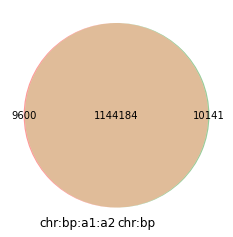

In [94]:
#1,144,184 in common
#9600 snps only in bim_merged(chr:bp)
#10140 snps only in bim file of old ids(chr:bp:a1:a2)
#draw venn plot of two sets of snps
venn2(subsets=[set(old_ids),set(bim_merged[1])],set_labels=('chr:bp:a1:a2','chr:bp'))

In [119]:
bim_TACERA = pd.read_csv("/exports/reum/CKe/Tacera/Final_imputed/TACERA_HRCv1_1_FINAL.bim",sep='\t',header=None)
bim_TACERA.rename(columns={0:"CHR",1:"CHRBP",3:"BP",4:"ALLELE1",5:"ALLELE2"},inplace=True)
bim_TACERA

,CHR,CHRBP,2,BP,ALLELE1,ALLELE2
0,1,1:13380,0,13380,G,C
1,1,1:54564,0,54564,T,G
2,1,1:55385,0,55385,G,A
3,1,1:56586,0,56586,A,G
4,1,1:57095,0,57095,C,T
...,...,...,...,...,...,...
21193886,22,22:51238513,0,51238513,G,C
21193887,22,22:51238660,0,51238660,G,A
21193888,22,22:51239586,0,51239586,G,T
21193889,22,22:51239678,0,51239678,T,G


In [122]:
bim_merged_old_idreshaped = bim_merged_old
bim_merged_old_idreshaped.rename(columns={0:"CHR",1:"CHRBP",3:"BP",4:"ALLELE1",5:"ALLELE2"},inplace=True)
bim_merged_old_idreshaped['CHRBP']=old_ids
bim_merged_old_idreshaped

,CHR,CHRBP,2,BP,ALLELE1,ALLELE2
0,1,1:730087,0,730087,C,T
1,1,1:781845,0,781845,G,A
2,1,1:790465,0,790465,A,G
3,1,1:800193,0,800193,T,A
4,1,1:810780,0,810780,C,G
...,...,...,...,...,...,...
1153779,22,22:51219006,0,51219006,A,G
1153780,22,22:51219704,0,51219704,A,G
1153781,22,22:51222100,0,51222100,T,G
1153782,22,22:51229805,0,51229805,C,T


In [123]:
merge_allele = pd.merge(bim_merged_old_idreshaped,bim_TACERA,how='inner',on='CHRBP',suffixes=['_chrbpa1a2','_Tacera'])

In [124]:
merge_allele

,CHR_chrbpa1a2,CHRBP,2_chrbpa1a2,BP_chrbpa1a2,ALLELE1_chrbpa1a2,ALLELE2_chrbpa1a2,CHR_Tacera,2_Tacera,BP_Tacera,ALLELE1_Tacera,ALLELE2_Tacera
0,1,1:876499,0,876499,A,G,1,0,876499,A,G
1,1,1:885676,0,885676,C,A,1,0,885676,C,A
2,1,1:909309,0,909309,C,T,1,0,909309,C,T
3,1,1:935398,0,935398,A,G,1,0,935398,A,G
4,1,1:944564,0,944564,C,T,1,0,944564,C,T
...,...,...,...,...,...,...,...,...,...,...,...
270306,22,22:51219006,0,51219006,A,G,22,0,51219006,A,G
270307,22,22:51219704,0,51219704,A,G,22,0,51219704,A,G
270308,22,22:51222100,0,51222100,T,G,22,0,51222100,T,G
270309,22,22:51229805,0,51229805,C,T,22,0,51229805,C,T


In [129]:
(merge_allele['ALLELE1_chrbpa1a2']!=merge_allele['ALLELE1_Tacera']).sum()

4057

In [137]:
merge_allele[merge_allele['ALLELE1_chrbpa1a2']!=merge_allele['ALLELE1_Tacera']]
#some are flipped, some disagree with each other
#remove all these

,CHR_chrbpa1a2,CHRBP,2_chrbpa1a2,BP_chrbpa1a2,ALLELE1_chrbpa1a2,ALLELE2_chrbpa1a2,CHR_Tacera,2_Tacera,BP_Tacera,ALLELE1_Tacera,ALLELE2_Tacera
59,1,1:2335969,0,2335969,G,C,1,0,2335969,T,C
146,1,1:4068052,0,4068052,A,G,1,0,4068052,G,A
148,1,1:4080764,0,4080764,T,C,1,0,4080764,C,T
301,1,1:5021112,0,5021112,T,C,1,0,5021112,C,T
359,1,1:6399780,0,6399780,G,A,1,0,6399780,C,A
...,...,...,...,...,...,...,...,...,...,...,...
269991,22,22:48514577,0,48514577,C,T,22,0,48514577,T,C
269994,22,22:48526700,0,48526700,G,A,22,0,48526700,A,G
270061,22,22:49097483,0,49097483,A,C,22,0,49097483,T,C
270076,22,22:49228841,0,49228841,G,A,22,0,49228841,A,G


In [145]:
#keeping all snps which has same effect allele
snplist_tacera = merge_allele[merge_allele['ALLELE1_chrbpa1a2']==merge_allele['ALLELE1_Tacera']]
snplist_tacera

,CHR_chrbpa1a2,CHRBP,2_chrbpa1a2,BP_chrbpa1a2,ALLELE1_chrbpa1a2,ALLELE2_chrbpa1a2,CHR_Tacera,2_Tacera,BP_Tacera,ALLELE1_Tacera,ALLELE2_Tacera
0,1,1:876499,0,876499,A,G,1,0,876499,A,G
1,1,1:885676,0,885676,C,A,1,0,885676,C,A
2,1,1:909309,0,909309,C,T,1,0,909309,C,T
3,1,1:935398,0,935398,A,G,1,0,935398,A,G
4,1,1:944564,0,944564,C,T,1,0,944564,C,T
...,...,...,...,...,...,...,...,...,...,...,...
270306,22,22:51219006,0,51219006,A,G,22,0,51219006,A,G
270307,22,22:51219704,0,51219704,A,G,22,0,51219704,A,G
270308,22,22:51222100,0,51222100,T,G,22,0,51222100,T,G
270309,22,22:51229805,0,51229805,C,T,22,0,51229805,C,T


In [147]:
snplist_tacera['CHRBP'].duplicated().sum()

0

In [144]:
snplist_tacera['CHRBP'].to_csv("/exports/reum/CKe/Tacera/Final_imputed/Extract_PCAmerged/snplist_PCAtacera.txt",header=None,index=None)

In [2]:
extracted_bim = pd.read_csv("/exports/reum/CKe/Tacera/Final_imputed/Extract_PCAmerged/TACERA_PCAmerged_overlaps.bim",sep='\t',header=None)
extracted_bim

,0,1,2,3,4,5
0,1,1:876499,0,876499,A,G
1,1,1:885676,0,885676,C,A
2,1,1:909309,0,909309,C,T
3,1,1:935398,0,935398,A,G
4,1,1:944564,0,944564,C,T
...,...,...,...,...,...,...
266603,22,22:51219006,0,51219006,A,G
266604,22,22:51219704,0,51219704,A,G
266605,22,22:51222100,0,51222100,T,G
266606,22,22:51229805,0,51229805,C,T


In [3]:
extracted_bim[1].duplicated().sum()
#multiallelics in extracted tacera data

354

In [ ]:
extracted_bim[1]

In [8]:
new_id = extracted_bim[1]+":"+extracted_bim[5]+":"+extracted_bim[4]

In [9]:
extracted_bim[1] = new_id

In [11]:
extracted_bim.to_csv("/exports/reum/CKe/Tacera/Final_imputed/Extract_PCAmerged/TACERA_PCAmerged_overlaps.bim",sep='\t',header=None,index=None)